# Facial Expressions Recognition

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Image](https://www.duarte.com/wp-content/uploads/Facial-Expression_1.png)

### Dataset

The dataset used in this project is the fer2013 dataset. The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image. You can download the dataset from [Kaggle](https://www.kaggle.com/datasets/msambare/fer2013).

### Objective

The objective of this project is to build a convolutional neural network model that can recognize human facial expressions.

## Import Libraries

Pada project ini library utama yang digunakan adalah **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, **Tensorflow**, dan **Keras**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Data Loading

Pada bagian ini data gambar akan di load menggunakan `ImageDataGenerator`.

In [2]:
train_path = 'dataset/train/'
test_path = 'dataset/test/'

In [3]:
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True, vertical_flip=True)
valid_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_gen.flow_from_directory(train_path, target_size=(48, 48), batch_size=23, class_mode='categorical', color_mode='grayscale')
valid_data = valid_gen.flow_from_directory(test_path, target_size=(48, 48), batch_size=23, class_mode='categorical', color_mode='grayscale')

Found 28693 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
classes = list(train_data.class_indices.keys())
print(f'Classes: {classes}')

Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Pada dataset ini terdapat **7 kelas** yang berbeda, yaitu:
- Angry
- Disgust
- Fear
- Happy
- Neutral
- Sad
- Surprise

## Exploratory Data Analysis

In [6]:
for dirpath, dirnames, filenames in os.walk(train_path):
  print(f'Found {len(dirnames)} folders with {len(filenames)} images in {dirpath}')

Found 7 folders with 0 images in dataset/train/
Found 0 folders with 3995 images in dataset/train/angry
Found 0 folders with 435 images in dataset/train/disgust
Found 0 folders with 4095 images in dataset/train/fear
Found 0 folders with 7210 images in dataset/train/happy
Found 0 folders with 4961 images in dataset/train/neutral
Found 0 folders with 4828 images in dataset/train/sad
Found 0 folders with 3169 images in dataset/train/surprise


In [7]:
for dirpath, dirnames, filenames in os.walk(test_path):
  print(f'Found {len(dirnames)} folders with {len(filenames)} images in {dirpath}')

Found 7 folders with 0 images in dataset/test/
Found 0 folders with 958 images in dataset/test/angry
Found 0 folders with 111 images in dataset/test/disgust
Found 0 folders with 1024 images in dataset/test/fear
Found 0 folders with 1774 images in dataset/test/happy
Found 0 folders with 1233 images in dataset/test/neutral
Found 0 folders with 1247 images in dataset/test/sad
Found 0 folders with 831 images in dataset/test/surprise


Jika dilihat dari jumlah datanya, kelas **disgust** memiliki jumlah data paling sedikit diantara kelas-kelas lainnya. Dimana pada training set hanya sebanyak **436 gambar** sedangakan pada testing set hanya sebanyak **111 gambar** saja.

### Sample Images

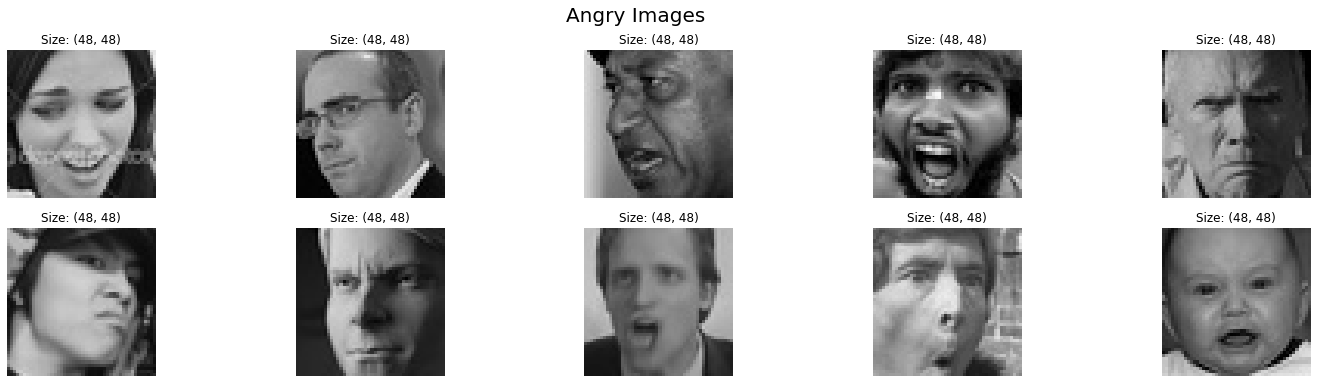

In [8]:
plt.figure(figsize=(25, 6))
plt.suptitle('Angry Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'angry/'), 1)
    img = image.load_img(train_path + 'angry/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

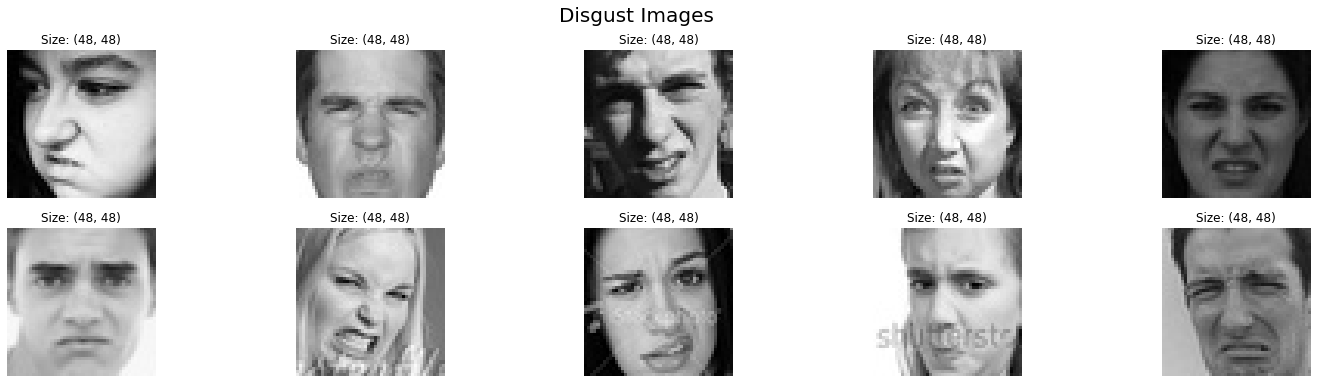

In [9]:
plt.figure(figsize=(25, 6))
plt.suptitle('Disgust Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'disgust/'), 1)
    img = image.load_img(train_path + 'disgust/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

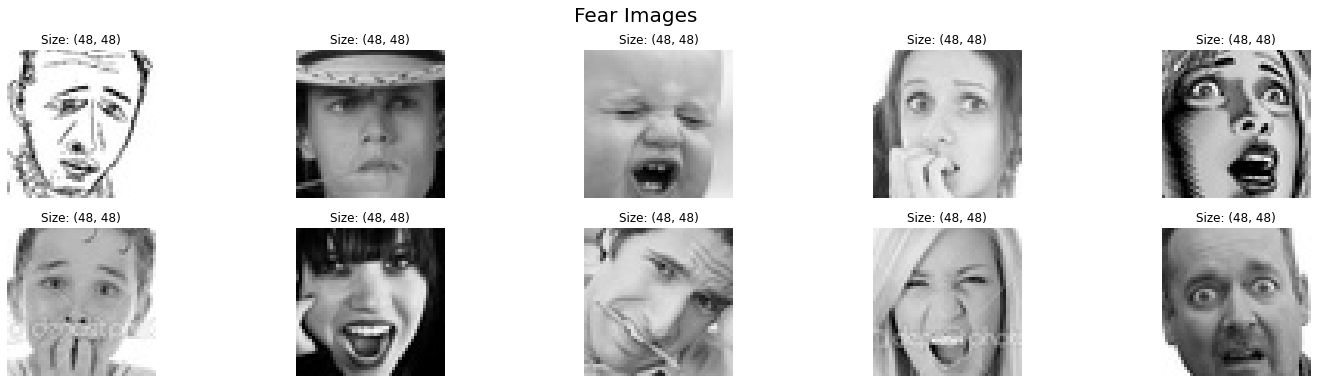

In [10]:
plt.figure(figsize=(25, 6))
plt.suptitle('Fear Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'fear/'), 1)
    img = image.load_img(train_path + 'fear/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

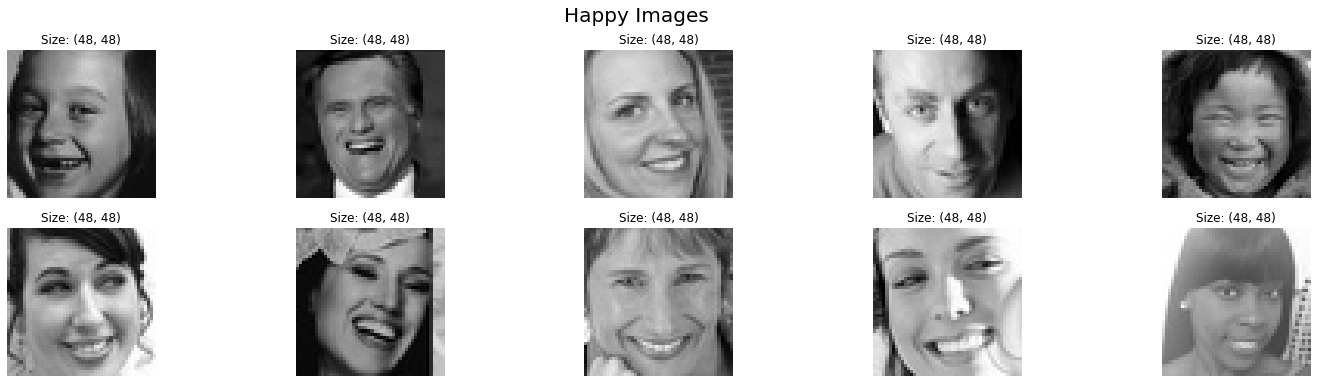

In [11]:
plt.figure(figsize=(25, 6))
plt.suptitle('Happy Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'happy/'), 1)
    img = image.load_img(train_path + 'happy/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

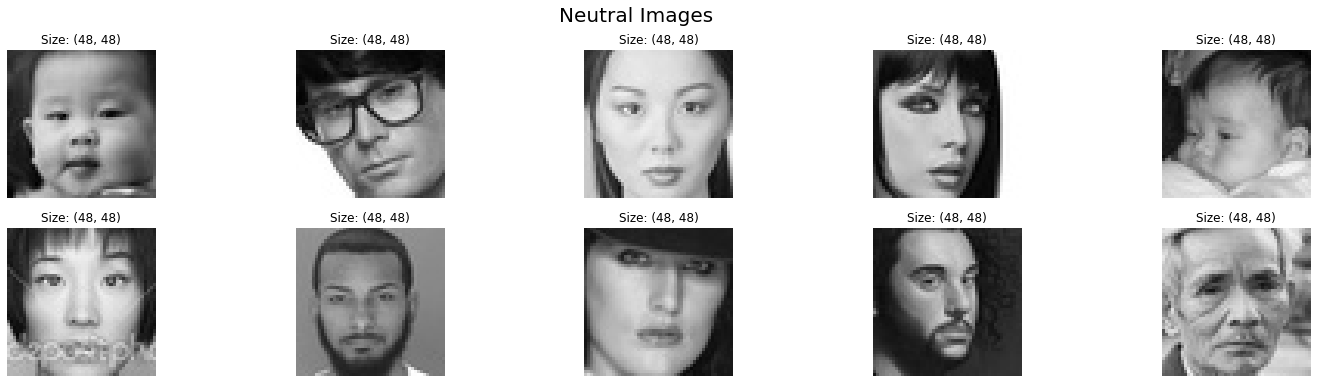

In [12]:
plt.figure(figsize=(25, 6))
plt.suptitle('Neutral Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'neutral/'), 1)
    img = image.load_img(train_path + 'neutral/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

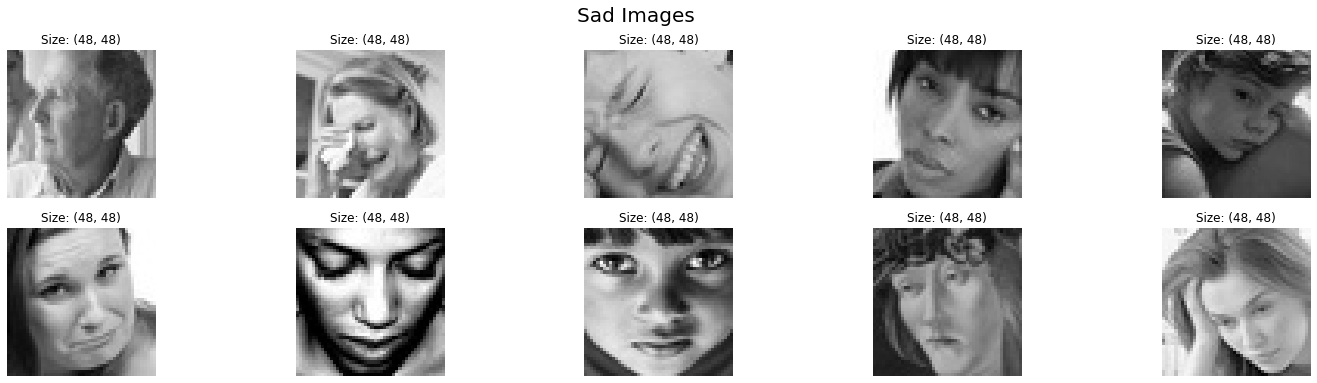

In [13]:
plt.figure(figsize=(25, 6))
plt.suptitle('Sad Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'sad/'), 1)
    img = image.load_img(train_path + 'sad/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

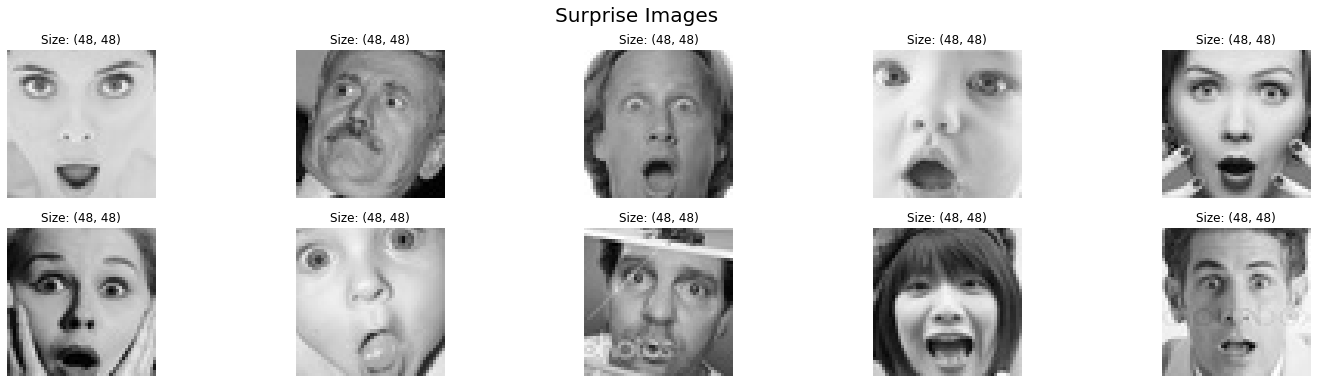

In [14]:
plt.figure(figsize=(25, 6))
plt.suptitle('Surprise Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'surprise/'), 1)
    img = image.load_img(train_path + 'surprise/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

Jika dilihat semua gambar sudah memiliki ukuran yang sama yaitu **48x48 pixel**.

## Data Preprocessing

Saat melakukan pengambilan data gambar dari direktori pada bagian **Data Loading**, data sudah dilakukan preprocessing dan augmentasi dengan menggunakan:
- `rescale` = 1./255
- `rotation_range` = 40
- `horizontal_flip` = True
- `vertical_flip` = True

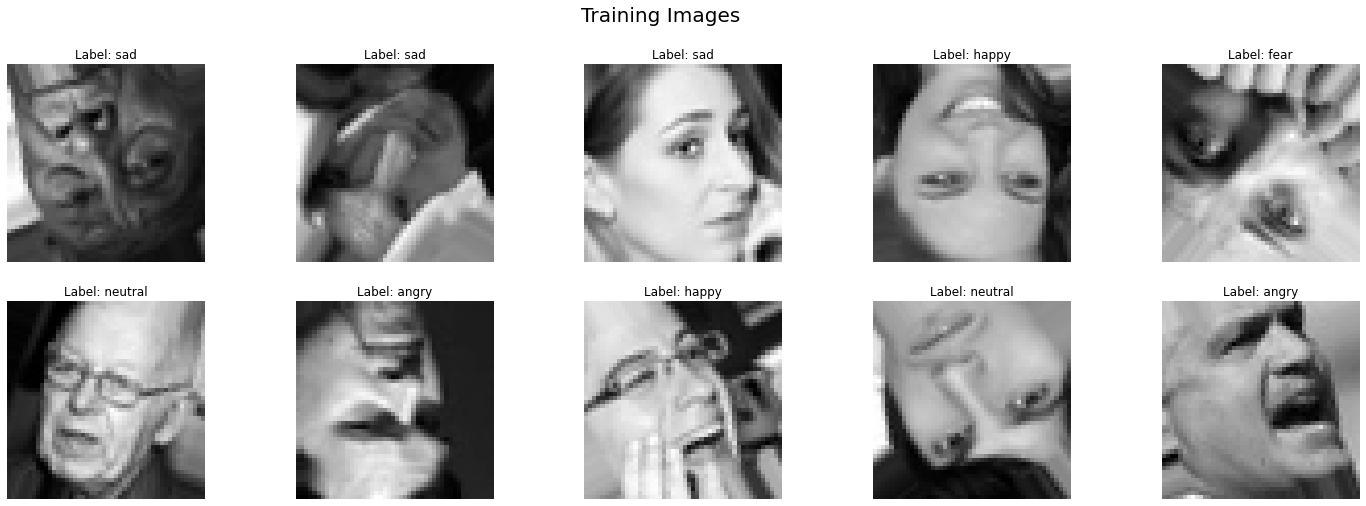

In [15]:
plt.figure(figsize=(25, 8))
plt.suptitle('Training Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_data[i][0][0], cmap='gray')
    plt.title(f'Label: {classes[np.argmax(train_data[i][1][0])]}')
    plt.axis('off')
plt.show()

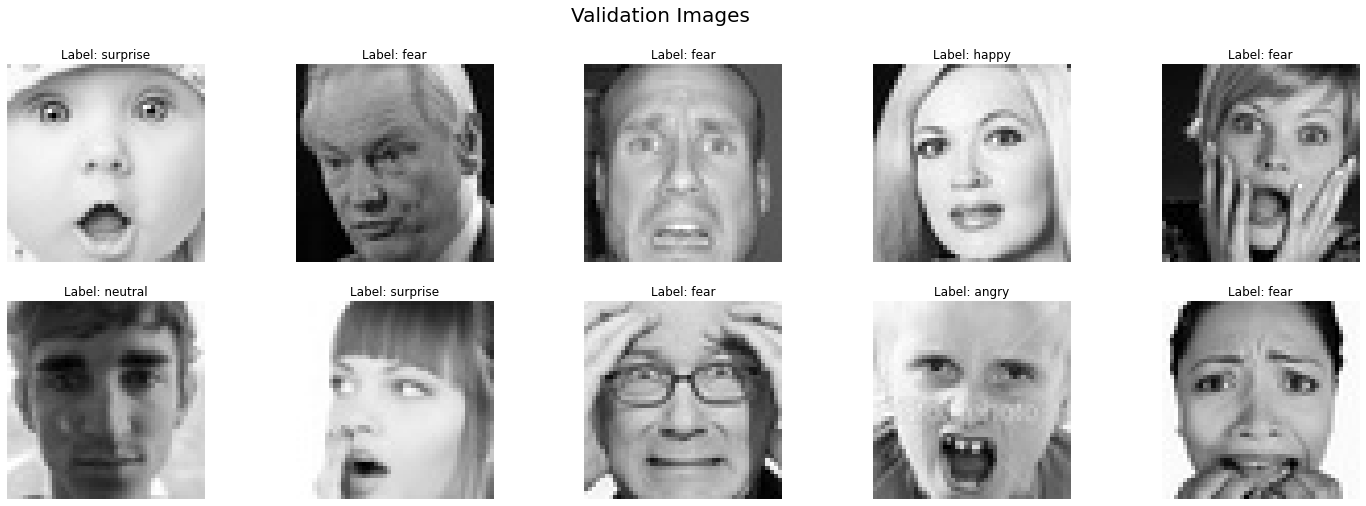

In [16]:
plt.figure(figsize=(25, 8))
plt.suptitle('Validation Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(valid_data[i][0][0], cmap='gray')
    plt.title(f'Label: {classes[np.argmax(valid_data[i][1][0])]}')
    plt.axis('off')
plt.show()

## Modeling

### Model Definition

In [27]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, 3, activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 18, 18, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                  

### Model Training

In [29]:
# Compile the model
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=60, validation_data=valid_data)

Epoch 1/60
1248/1248 [==============================] - 21s 16ms/step - loss: 1.8394 - accuracy: 0.2378 - val_loss: 1.7955 - val_accuracy: 0.2471
Epoch 2/60
1248/1248 [==============================] - 20s 16ms/step - loss: 1.7983 - accuracy: 0.2495 - val_loss: 1.7433 - val_accuracy: 0.2903
Epoch 3/60
1248/1248 [==============================] - 20s 16ms/step - loss: 1.7639 - accuracy: 0.2722 - val_loss: 1.7104 - val_accuracy: 0.3076
Epoch 4/60
1248/1248 [==============================] - 20s 16ms/step - loss: 1.7336 - accuracy: 0.2917 - val_loss: 1.6675 - val_accuracy: 0.3222
Epoch 5/60
1248/1248 [==============================] - 20s 16ms/step - loss: 1.6756 - accuracy: 0.3259 - val_loss: 1.5524 - val_accuracy: 0.3980
Epoch 6/60
1248/1248 [==============================] - 20s 16ms/step - loss: 1.5901 - accuracy: 0.3788 - val_loss: 1.4941 - val_accuracy: 0.4345
Epoch 7/60
1248/1248 [==============================] - 20s 16ms/step - loss: 1.5382 - accuracy: 0.4044 - val_loss: 1.4356 -

## Model Evaluation

In [30]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.839443,0.237758,1.795464,0.247144
1,1.798344,0.249503,1.743318,0.290332
2,1.763876,0.272157,1.710434,0.307607
3,1.733588,0.291744,1.667499,0.322235
4,1.675590,0.325863,1.552416,0.398022


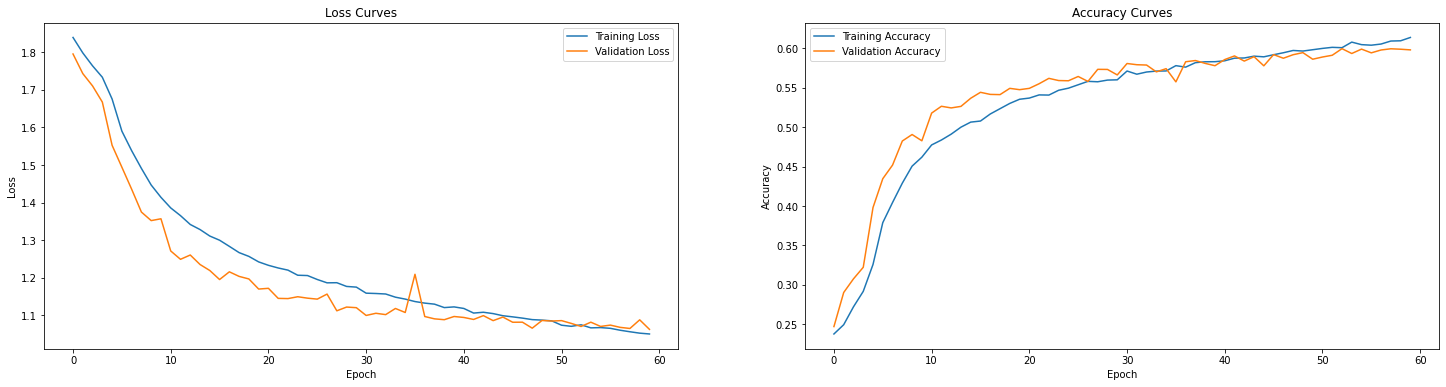

In [31]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.loss, label='Training Loss')
plt.plot(metrics.val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(metrics.accuracy, label='Training Accuracy')
plt.plot(metrics.val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()